In [16]:
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier 
from sklearn.impute import SimpleImputer
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from math import log
from sklearn.preprocessing import OneHotEncoder 
from sklearn import tree
from sklearn import metrics
from xgboost import plot_importance
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [17]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [18]:
df.shape

(5110, 12)

In [19]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [20]:
gender_value = df.groupby("gender").size()
gender_value

gender
Female    2994
Male      2115
Other        1
dtype: int64

In [6]:
df.loc[(df['gender'] >= 'Other')]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [7]:
df = df.drop(3116)

In [8]:
X = df[['smoking_status', 'gender', 'Residence_type', 'hypertension']]
y = df[['stroke']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [9]:
ohe = OneHotEncoder()

ohe.fit(X_train)
X_train_ohe = ohe.transform(X_train).toarray()

ohe_df = pd.DataFrame(X_train_ohe, columns=ohe.get_feature_names(X_train.columns))

df = ohe_df

df

,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,gender_Female,gender_Male,Residence_type_Rural,Residence_type_Urban,hypertension_0,hypertension_1
0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
3571,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3572,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
3573,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3574,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [10]:
clf = DecisionTreeClassifier(criterion='entropy')

clf.fit(X_train_ohe, y_train)

DecisionTreeClassifier(criterion='entropy')

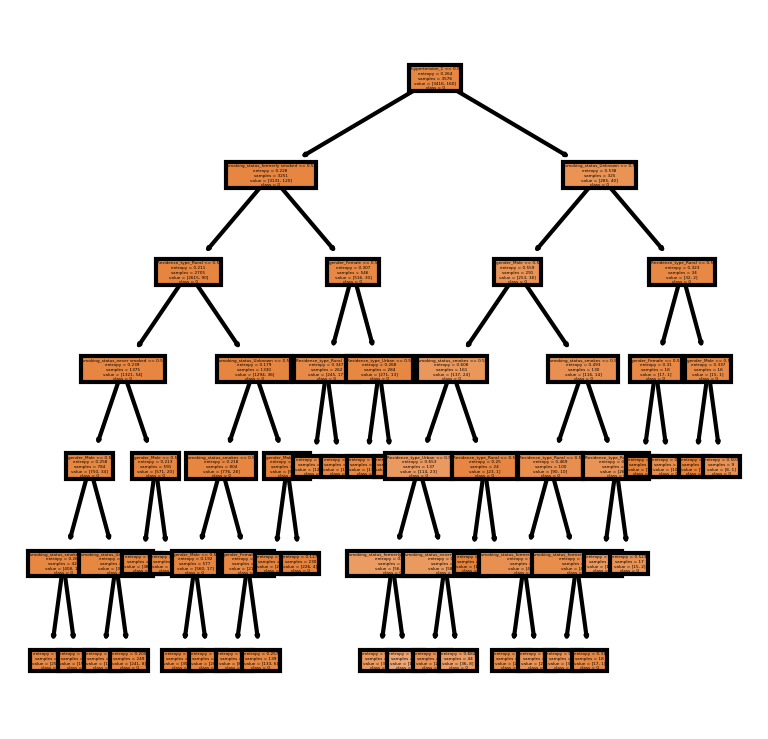

In [11]:
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (3,3), dpi=300)
tree.plot_tree(clf,
               feature_names = ohe_df.columns, 
               class_names=np.unique(y).astype('str'),
               filled = True)
plt.show()

In [12]:
X_test_ohe = ohe.transform(X_test)
y_preds = clf.predict(X_test_ohe)

print('Accuracy: ', accuracy_score(y_test, y_preds))

Accuracy:  0.9419439008480104
